# Figures data Prades - %C, N, $\delta^{13}$C



### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import re
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
control=[5,7,9,10]
drought=[2,3,4,6]

In [3]:
pools=['ER','FFSR','Soil inc. 0-5','Soil inc. 5-10', 'Wood', 'Foliage','Fine litter','Coarse litter', 'Roots 0-5','Roots 5-10', 'Roots 10-15', 'Roots 15-20', 'Soil 0-5', 'Soil 5-10', 'Soil 10-15', 'Soil 15-20']
Cperc=np.zeros([2,len(pools)])*np.nan # % of carbon. control, drought.
Cperc_sd=np.zeros([2,len(pools)])*np.nan # standard deviation of % of carbon. control, drought.
test=np.zeros(len(pools))*np.nan

### Carbon and nitrogen -- Soil

In [4]:
data=pd.read_excel('Data/LabResults/Solids_soil_Ctotal-Ntotal.xlsx',header=11)

depths=data.SN2.unique()
temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int);treat=['']*len(data)
for i in range(len(data)):
    b=data['Sample name'][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
data['plot']=plot; data['treatment']=treat

con=data[data['plot'].isin(control)] 
dro=data[data['plot'].isin(drought)] 

/tmp/ipykernel_16403/2225516530.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  res2[i,j]=w2.Result.mean();std2[i,j]=w2.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
/home/_ehoyos/anaconda3/envs/bgc_md2/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_16403/2225516530.py:47: RuntimeWarning: divide by zero encountered in double_scalars
  res2[i,j]=w2.Result.mean();std2[i,j]=w2.Result.std()/np.sqrt(len(w[~w.Result.isna()]))


Text(0.5, 1.0, 'Nitrogen, drought plots')

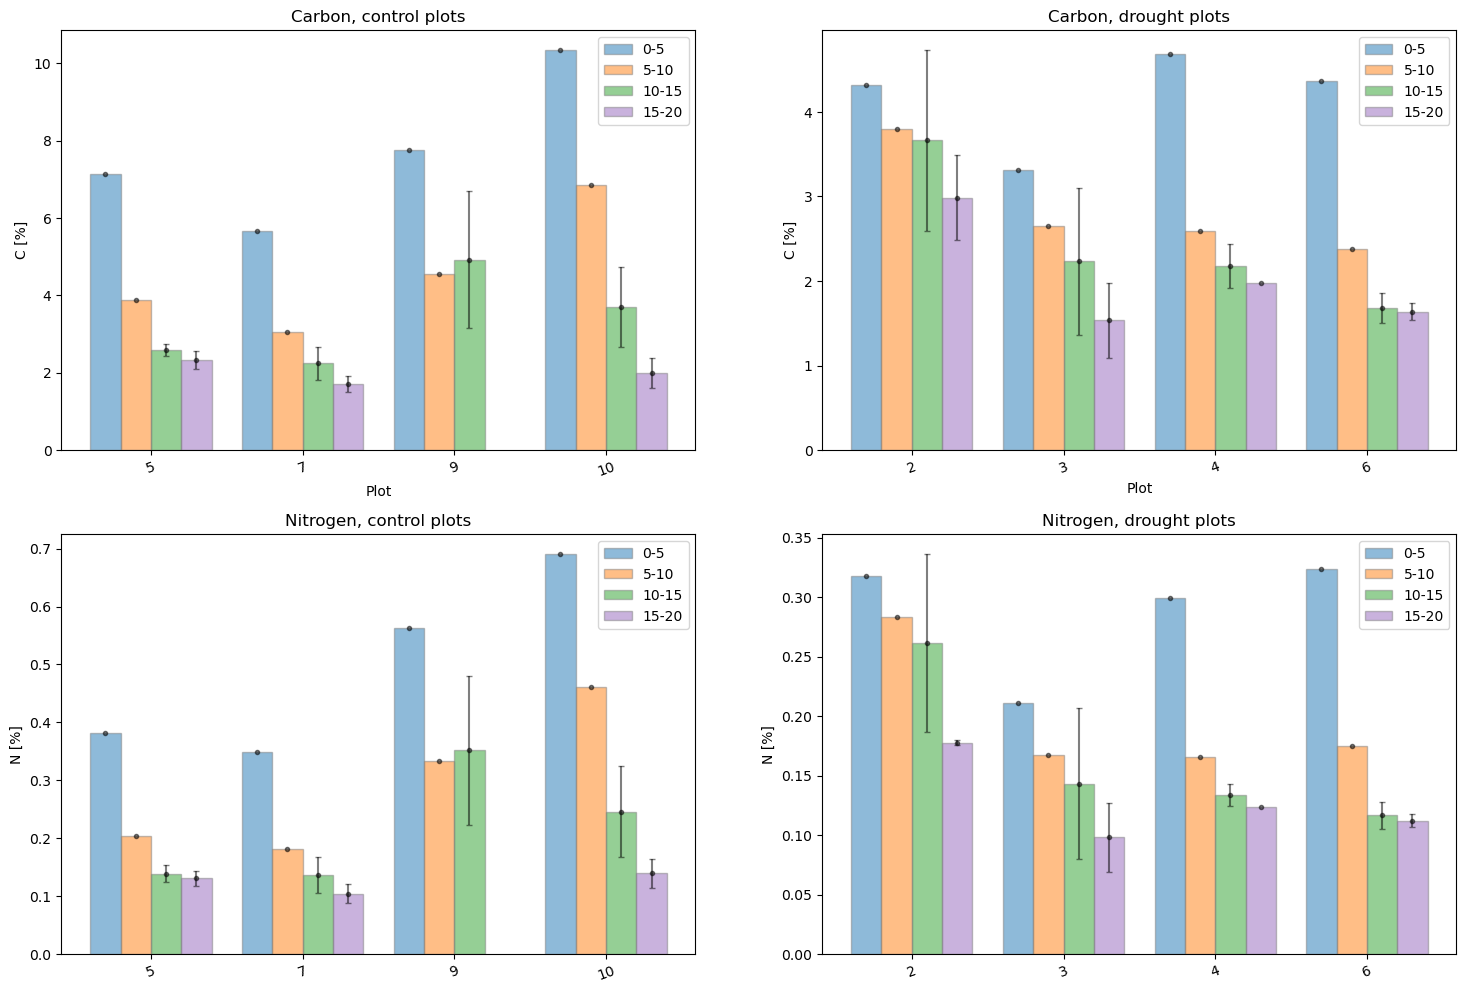

In [5]:
conC=con[con.Parameter=='Ctotal']; droC=dro[dro.Parameter=='Ctotal']
conN=con[con.Parameter=='Ntotal']; droN=dro[dro.Parameter=='Ntotal']
fig,axs=plt.subplots(2,2,figsize=[18,12])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))

barWidth=0.20
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

## Carbon
res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=conC[(conC['plot']==control[i])&(conC['SN2']==depths[j])]
        res1[i,j]=w.Result.mean();std1[i,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
        w2=droC[(droC['plot']==drought[i])&(droC['SN2']==depths[j])]
        res2[i,j]=w2.Result.mean();std2[i,j]=w2.Result.std()/np.sqrt(len(w[~w.Result.isna()]))

for i in range(len(depths)):
    axs[0,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[0,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0,0].legend()
axs[0,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control,rotation=20)
axs[0,0].set_ylabel('C [%]');axs[0,0].set_xlabel('Plot')
axs[0,0].set_title('Carbon, control plots')
axs[0,1].legend()
axs[0,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought,rotation=20)
axs[0,1].set_ylabel('C [%]');axs[0,1].set_xlabel('Plot')
axs[0,1].set_title('Carbon, drought plots')    

##Nitrogen

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=conN[(conN['plot']==control[i])&(conN['SN2']==depths[j])]
        res1[i,j]=w.Result.mean();std1[i,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
        w2=droN[(droN['plot']==drought[i])&(droN['SN2']==depths[j])]
        res2[i,j]=w2.Result.mean();std2[i,j]=w2.Result.std()/np.sqrt(len(w[~w.Result.isna()]))

for i in range(len(depths)):
    axs[1,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[1,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1,0].legend()
axs[1,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control,rotation=20)
axs[1,0].set_ylabel('N [%]');axs[0,0].set_xlabel('Plot')
axs[1,0].set_title('Nitrogen, control plots')
axs[1,1].legend()
axs[1,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought,rotation=20)
axs[1,1].set_ylabel('N [%]');axs[0,1].set_xlabel('Plot')
axs[1,1].set_title('Nitrogen, drought plots') 

Text(0.5, 1.0, 'Nitrogen')

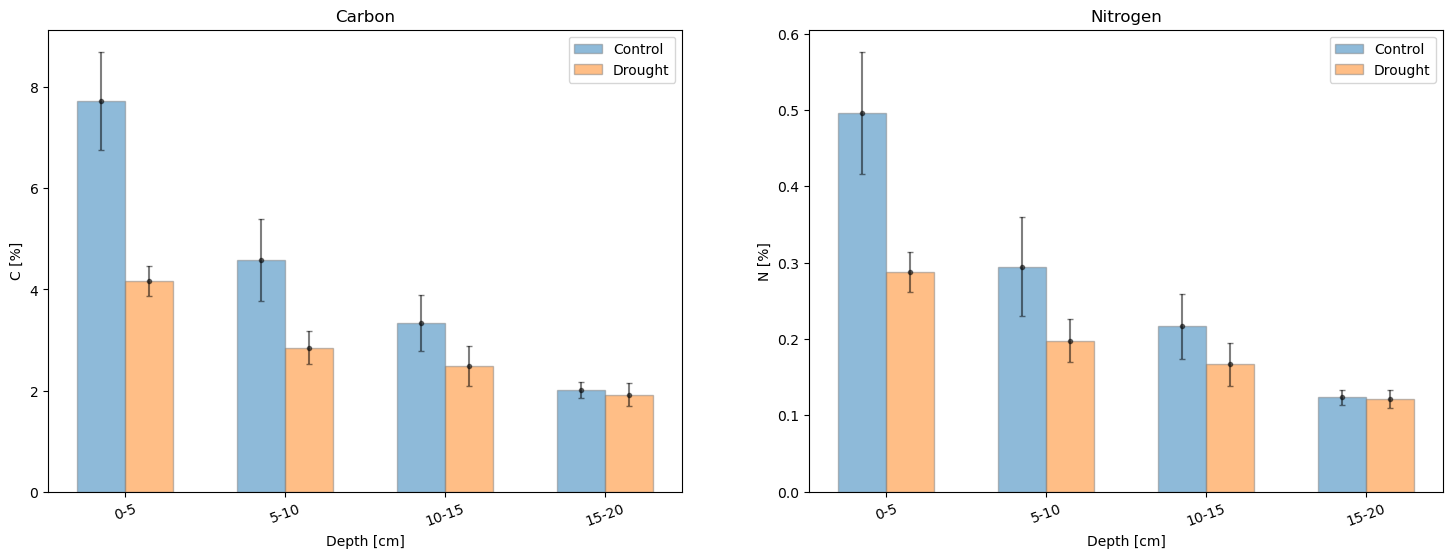

In [19]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
treat=['Control','Drought']

barWidth=0.3
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

## Carbon
res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
#for j in range(len(depths)):
for j in range(len(depths)):
    w=conC[conC['SN2']==depths[j]]
    res[0,j]=w.Result.mean();std[0,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
    w=droC[droC['SN2']==depths[j]]
    res[1,j]=w.Result.mean();std[1,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
for i in range(2):
    axs[0].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[0].set_ylabel('C [%]');axs[0].set_xlabel('Depth [cm]')
axs[0].set_title('Carbon')
Cperc[:,12:16]=res; Cperc_sd[:,12:16]=std

# Nitrogen
res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=conN[conN['SN2']==depths[j]]
    res[0,j]=w.Result.mean();std[0,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
    w=droN[droN['SN2']==depths[j]]
    res[1,j]=w.Result.mean();std[1,j]=w.Result.std()/np.sqrt(len(w[~w.Result.isna()]))
for i in range(2):
    axs[1].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].legend()
axs[1].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[1].set_ylabel('N [%]');axs[1].set_xlabel('Depth [cm]')
axs[1].set_title('Nitrogen')

##### Statistical test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Levene test of variance, P_val:2.676e-01 Stat=1.493e+00
0-5_Control vs. 0-5_Drought: Levene test of variance, P_val:1.960e-01 Stat=2.117e+00
10-15_Control vs. 10-15_Drought: Levene test of variance, P_val:5.827e-01 Stat=3.091e-01
15-20_Control vs. 15-20_Drought: Levene test of variance, P_val:3.109e-01 Stat=1.076e+00


Text(0.5, 14.722222222222216, 'Depth [cm]')

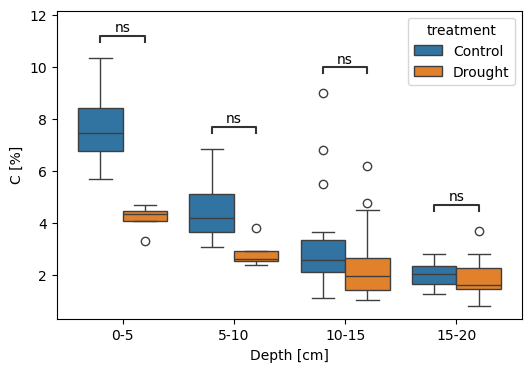

In [6]:
dataC=data[data.Parameter=='Ctotal']
fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

states_palette = sns.color_palette("tab10", n_colors=2)
states_order = treat
subcat_order = depths
hue_plot_params = {
    'data': dataC,
    'x': "SN2",
    'y': "Result",
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Levene').apply_and_annotate()
axs.set_ylabel('C [%]');axs.set_xlabel('Depth [cm]')
##t-test_ind, t-test_welch, t-test_paired, Mann-Whitney, Mann-Whitney-gt, Mann-Whitney-ls, Levene*, Wilcoxon, Kruskal, Brunner-Munzel



In [7]:
# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)

temp=w[0]
w[0]=w[1]
w[1]=temp

test[12:16]=w

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Levene test of variance, P_val:2.676e-01 Stat=1.493e+00
0-5_Control vs. 0-5_Drought: Levene test of variance, P_val:1.960e-01 Stat=2.117e+00
10-15_Control vs. 10-15_Drought: Levene test of variance, P_val:5.827e-01 Stat=3.091e-01
15-20_Control vs. 15-20_Drought: Levene test of variance, P_val:3.109e-01 Stat=1.076e+00


<Figure size 640x480 with 0 Axes>

#### Differences among depths

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10-15_Control vs. 15-20_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:3.556e-02 Stat=4.418e+00
0-5_Control vs. 5-10_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.331e-02 Stat=4.083e+00
5-10_Control vs. 10-15_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.743e-02 Stat=3.610e+00
0-5_Drought vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.331e-02 Stat=4.083e+00
10-15_Drought vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.752e-01 Stat=5.098e-01
5-10_Drought vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.301e-01 Stat=1.440e+00
5-10_Control vs. 15-20_Control: Kruskal-Wallis independent s

Text(0.5, 14.722222222222216, 'Depth [cm]')

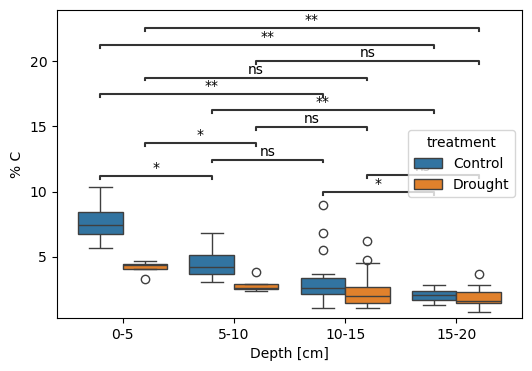

In [8]:
fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('5-10', 'Control')],
    [('0-5', 'Control'), ('10-15', 'Control')],
    [('0-5', 'Control'), ('15-20', 'Control')],
    [('5-10', 'Control'), ('10-15', 'Control')],
    [('5-10', 'Control'), ('15-20', 'Control')],
    [('10-15', 'Control'), ('15-20', 'Control')],
    [('0-5', 'Drought'), ('5-10', 'Drought')],
    [('0-5', 'Drought'), ('10-15', 'Drought')],
    [('0-5', 'Drought'), ('15-20', 'Drought')],
    [('5-10', 'Drought'), ('10-15', 'Drought')],
    [('5-10', 'Drought'), ('15-20', 'Drought')],
    [('10-15', 'Drought'), ('15-20', 'Drought')],
]

depths=dataC.SN2.unique()
states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=depths
hue_plot_params = {
    'data':dataC,
    'x': "SN2",
    'y': "Result",
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel('% C');axs.set_xlabel('Depth [cm]')

### Amount of carbon

/tmp/ipykernel_16403/1886171433.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC["Bulkden"]=np.nan
/tmp/ipykernel_16403/1886171433.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataC['totalC']=(dataC["Bulkden"]*dataC["Result"]/100*5)*1e-6/1e-8 # total C in t C/ha.


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.331e-02 Stat=4.083e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.092e-02 Stat=5.333e+00
10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.103e-01 Stat=2.550e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.639e-01 Stat=1.888e-01


Text(0.5, 14.722222222222216, 'Depth [cm]')

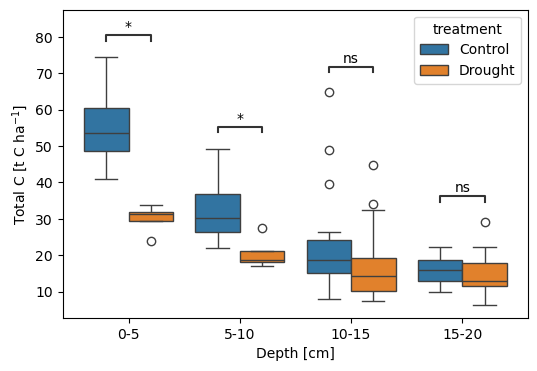

In [9]:
da0_15=1.44 # bulk density Horizon A (0-15cm) [g/cm3].
da15_30=1.58 # bulk density Horizon A (0-15cm) [g/cm3].

dataC["Bulkden"]=np.nan
dataC.loc[dataC['SN2'].isin(depths[:-1]),'Bulkden']=da0_15
dataC.loc[dataC['SN2']==depths[-1],'Bulkden']=da15_30

dataC['totalC']=(dataC["Bulkden"]*dataC["Result"]/100*5)*1e-6/1e-8 # total C in t C/ha.

fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

states_palette = sns.color_palette("tab10", n_colors=2)
states_order = treat
subcat_order = depths
hue_plot_params = {
    'data': dataC,
    'x': "SN2",
    'y': "totalC",
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs,**hue_plot_params)
annotator=Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel('Total C [t C ha$^{-1}$]');axs.set_xlabel('Depth [cm]')


In [21]:
pr=3
dataC.totalC[(dataC.SN2==depths[pr])&(dataC.treatment=='Control')].mean()-dataC.totalC[(dataC.SN2==depths[pr])&(dataC.treatment=='Drought')].mean()

0.733957445288036

### Carbon -- Vegetation (Roots, Fine litter, Coarse litter)

In [37]:
df1=pd.read_excel('Data/LabResults/Solids_veg_d13C_C_Box1.xls',sheet_name=1,header=10)
df2=pd.read_excel('Data/LabResults/Solids_veg_d13C_C_Box2.xls',sheet_name=1,header=10)
data=pd.concat([df1, df2]); data=data.reset_index(drop=True)
temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(data),dtype=int); depth=['']*len(data)

poold=data.columns[2]
roots=data[data[poold]=='Roots']; roots=roots.reset_index(drop=True)
litterF=data[data[poold]=='Fine Litter']; litterF=litterF.reset_index(drop=True)
litterC=data[data[poold]=='Coarse Litter ']; litterC=litterC.reset_index(drop=True)

temp=re.compile("([a-zA-Z]+)([0-9]+)")
plot=np.empty(len(roots),dtype=int); depth=['']*len(roots);treat=['']*len(roots)
for i in range(len(roots)):
    b=roots[roots.columns[3]][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    depth[i]=(roots[roots.columns[3]][i].split('_')[-1]).split(' ')[-1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
roots['plot']=plot; roots['depth']=depth; roots['treatment']=treat 

plot=np.empty(len(litterF),dtype=int);treat=['']*len(litterF)
for i in range(len(litterF)):
    b=litterF[litterF.columns[3]][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
litterF['plot']=plot; litterF['treatment']=treat 

plot=np.empty(len(litterC),dtype=int);treat=['']*len(litterC)
for i in range(len(litterC)):
    b=litterC[litterC.columns[3]][i].split('_')[1]
    plot[i]=temp.match(b).groups()[1]
    if plot[i] in control: treat[i]='Control'
    if plot[i] in drought: treat[i]='Drought'
litterC['plot']=plot; litterC['treatment']=treat 

Text(0.5, 1.0, 'Course litter, drought plots')

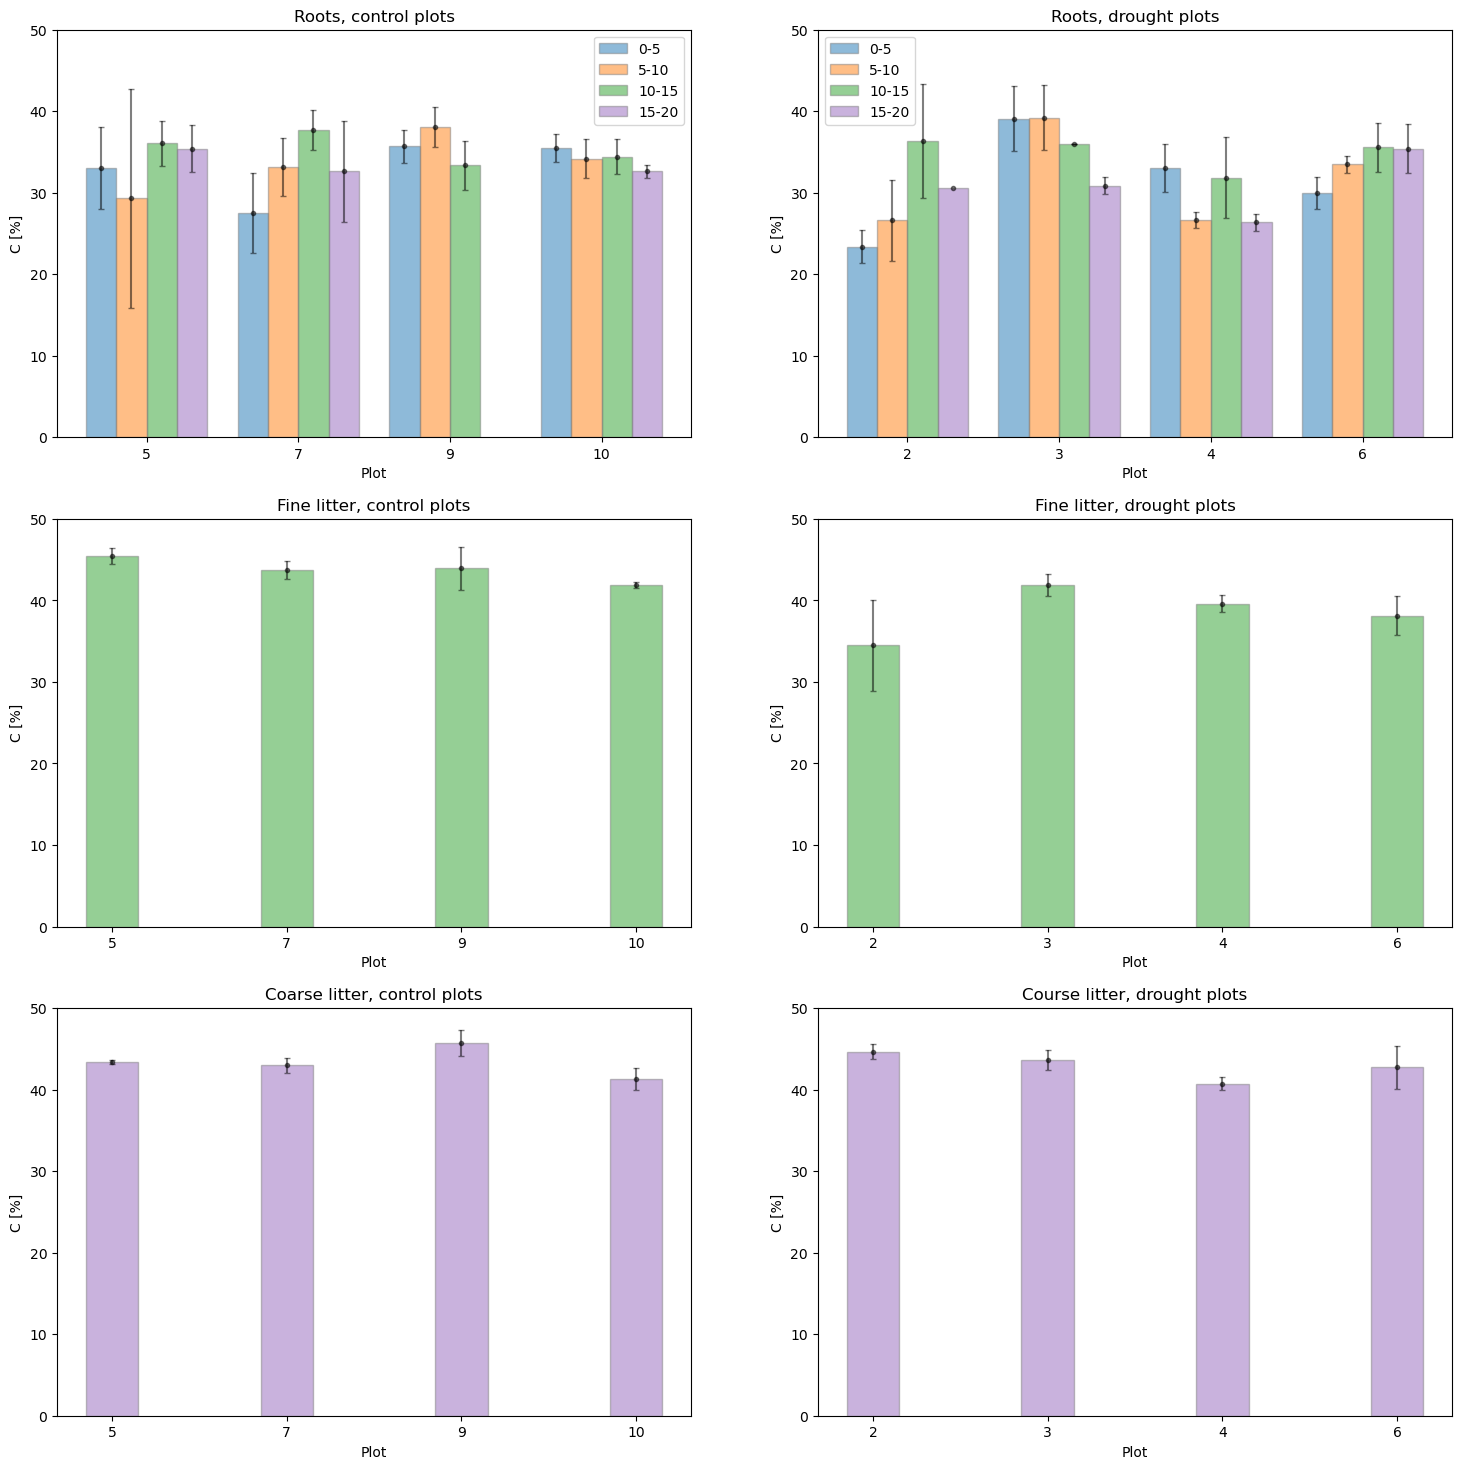

In [38]:
fig,axs=plt.subplots(3,2,figsize=[18,18])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20

## Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w.concentration.mean();std1[i,j]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w.concentration.mean();std2[i,j]=w.concentration.std()//np.sqrt(len(w[~w.concentration.isna()]))

br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

for i in range(len(depths)):
    axs[0,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[0,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0,0].legend();axs[0,1].legend()
axs[0,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[0,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0,0].set_ylabel('C [%]');axs[0,1].set_ylabel('C [%]')
axs[0,0].set_xlabel('Plot'); axs[0,1].set_xlabel('Plot')
axs[0,0].set_title('Roots, control plots'); axs[0,1].set_title('Roots, drought plots')
axs[0,0].set_ylim(0,50); axs[0,1].set_ylim(0,50)

# Fine litter
df=litterF
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
#res2=np.zeros(4)*np.nan; std2=np.zeros(4)*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w.concentration.mean();std[0,i]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w.concentration.mean();std[1,i]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
for i in range(2):
    axs[1,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[2],alpha=0.5) 
    axs[1,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1,i].set_ylabel('C [%]'); axs[1,i].set_xlabel('Plot'); axs[1,i].set_ylim(0,50)
axs[1,0].set_xticks([r for r in range(len(control))],control)
axs[1,1].set_xticks([r for r in range(len(drought))],drought)
axs[1,0].set_title('Fine litter, control plots'); axs[1,1].set_title('Fine litter, drought plots')

# Course litter
df=litterC
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w.concentration.mean();std[0,i]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w.concentration.mean();std[1,i]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
for i in range(2):
    axs[2,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[3],alpha=0.5) 
    axs[2,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[2,i].set_ylabel('C [%]'); axs[2,i].set_xlabel('Plot'); axs[2,i].set_ylim(0,50)
axs[2,0].set_xticks([r for r in range(len(control))],control)
axs[2,1].set_xticks([r for r in range(len(drought))],drought)
axs[2,0].set_title('Coarse litter, control plots'); axs[2,1].set_title('Course litter, drought plots')


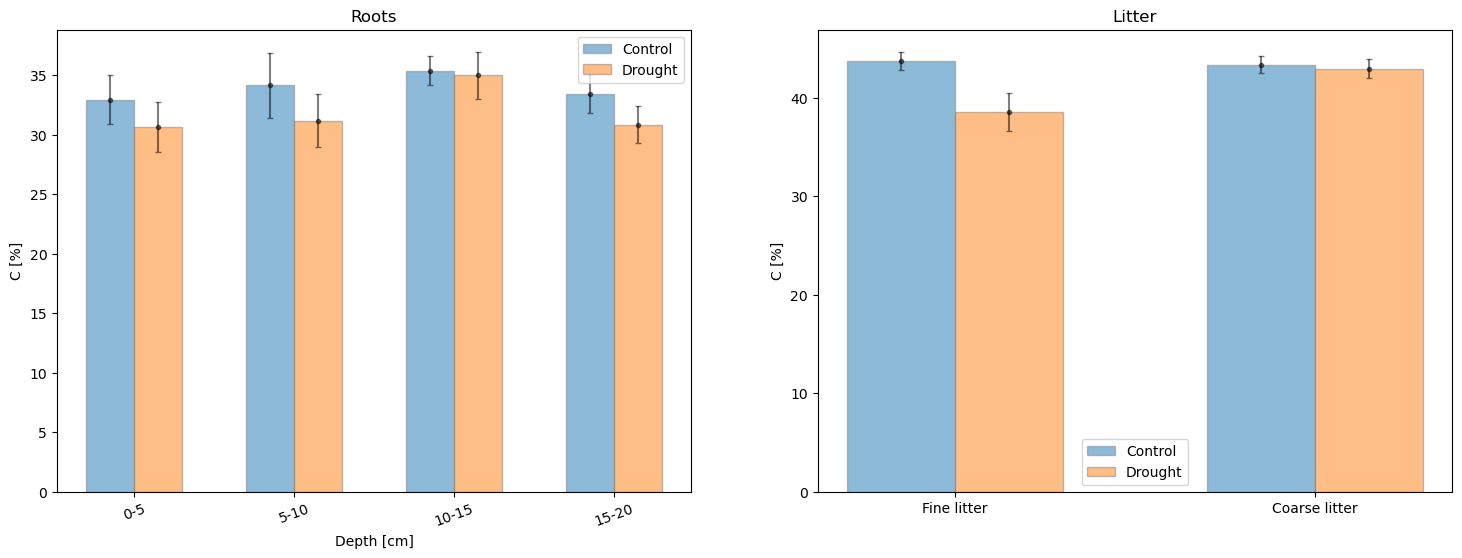

In [39]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20

# Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w.concentration.mean();std[0,j]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w.concentration.mean();std[1,j]=w.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))

treat=['Control','Drought']
barWidth=0.3
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]



for i in range(2):
    axs[0].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[0].set_ylabel('C [%]');axs[0].set_xlabel('Depth [cm]')
axs[0].set_title('Roots')
Cperc[:,8:12]=res; Cperc_sd[:,8:12]=std

## Litter
res=np.zeros([2,2])*np.nan; std=np.zeros([2,2])*np.nan
df=litterF
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[0,0]=con.concentration.mean();std[0,0]=con.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
res[0,1]=dro.concentration.mean();std[0,1]=dro.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
df=litterC
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[1,0]=con.concentration.mean();std[1,0]=con.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))
res[1,1]=dro.concentration.mean();std[1,1]=dro.concentration.std()/np.sqrt(len(w[~w.concentration.isna()]))

barWidth=0.3
br1=np.arange(2)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[1].bar(br[i],res[:,i],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res[:,i],std[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].legend()
axs[1].set_xticks([r+barWidth/2 for r in range(2)],['Fine litter','Coarse litter'])
axs[1].set_ylabel('C [%]')
axs[1].set_title('Litter')
Cperc[:,6:8]=res; Cperc_sd[:,6:8]=std


In [71]:
v=litter[(litter.Litter=='Coarse') & (litter.treatment=='Drought')]
v.shape
print(v.concentration.mean(), v.concentration.std(), v.concentration.min(),v.concentration.max())

42.94052717452373 2.7627186565829707 39.39991367512585 47.94543863818625


##### Statistical test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.530e-01 Stat=1.307e+00
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:5.688e-01 Stat=3.247e-01
10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.312e-01 Stat=4.545e-02
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.649e-01 Stat=1.929e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.530e-01 Stat=1.30

/tmp/ipykernel_11371/1574886367.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Litter']=a2; b['Litter']=b2
/tmp/ipykernel_11371/1574886367.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Litter']=a2; b['Litter']=b2


p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Coarse_Control vs. Coarse_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.529e-01 Stat=5.633e-01
Fine_Control vs. Fine_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.680e-03 Stat=9.013e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Coarse_Control vs. Coarse_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.529e-01 Stat=5.633e-01
Fine_Control vs. Fine_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.680e-03 Stat=9.013e+00


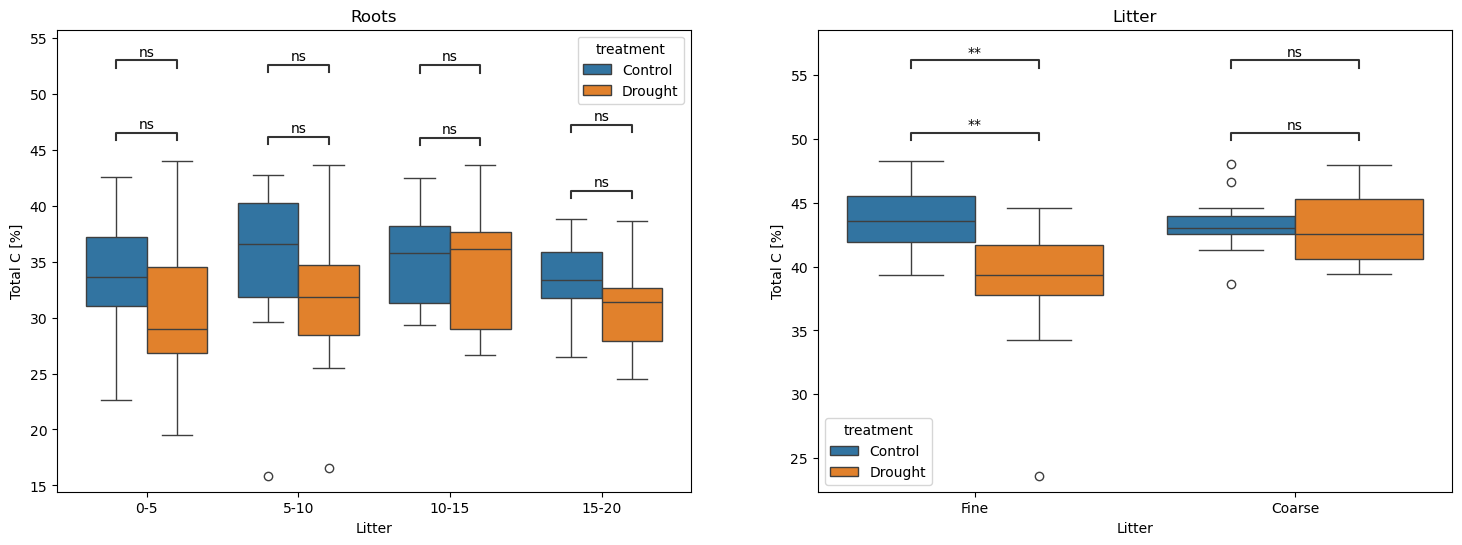

In [40]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
treat=['Control','Drought']

## Roots
pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

states_palette = sns.color_palette("tab10", n_colors=2)
states_order = treat
subcat_order = depths
hue_plot_params = {
    'data': roots,
    'x': "depth",
    'y': "concentration",
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs[0], **hue_plot_params)
annotator = Annotator(axs[0], pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs[0].set_ylabel('Total C [%]');axs[0].set_xlabel('Depth [cm]')

# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)
temp=w[0]
w[0]=w[1]
w[1]=temp
test[8:12]=w

## Litter
a=litterF[['concentration','plot','treatment']]; b=litterC[['concentration','plot','treatment']]
a2=['Fine']*len(litterF);b2=['Coarse']*len(litterC)
a['Litter']=a2; b['Litter']=b2
litter=pd.concat([a,b])

pairs = [
    [('Fine', 'Control'), ('Fine', 'Drought')],
    [('Coarse', 'Control'), ('Coarse', 'Drought')]
]

states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=['Fine','Coarse']
hue_plot_params = {
    'data': litter,
    'x': "Litter",
    'y': "concentration",
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs[1],**hue_plot_params)
annotator=Annotator(axs[1],pairs,**hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs[1].set_ylabel('Total C [%]');axs[0].set_xlabel('Litter')

axs[0].set_title('Roots'); axs[1].set_title('Litter')

# save results of statistical test.
_, results = annotator.apply_and_annotate()
stat_results=[result.data.pvalue for result in results]
w=np.array(stat_results)
temp=w[0]
w[0]=w[1]
w[1]=temp
test[6:8]=w


#### Differences among depths

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

10-15_Control vs. 15-20_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.469e-01 Stat=5.786e-01
0-5_Control vs. 5-10_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.272e-01 Stat=2.359e-01
5-10_Control vs. 10-15_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.312e-01 Stat=4.545e-02
0-5_Drought vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.327e-01 Stat=4.463e-02
10-15_Drought vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.779e-01 Stat=1.815e+00
5-10_Drought vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.651e-01 Stat=1.927e+00
5-10_Control vs. 15-20_Control: Kruskal-Wallis independent s

Text(0.5, 14.722222222222216, 'Depth [cm]')

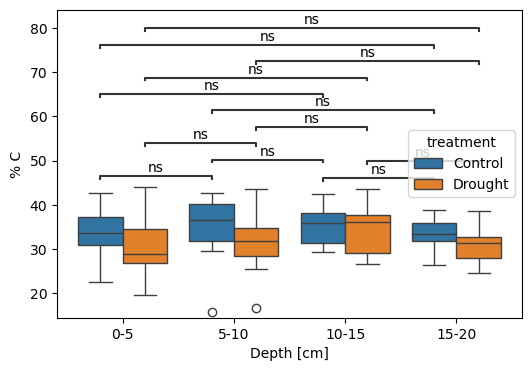

In [43]:
fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('0-5', 'Control'), ('5-10', 'Control')],
    [('0-5', 'Control'), ('10-15', 'Control')],
    [('0-5', 'Control'), ('15-20', 'Control')],
    [('5-10', 'Control'), ('10-15', 'Control')],
    [('5-10', 'Control'), ('15-20', 'Control')],
    [('10-15', 'Control'), ('15-20', 'Control')],
    [('0-5', 'Drought'), ('5-10', 'Drought')],
    [('0-5', 'Drought'), ('10-15', 'Drought')],
    [('0-5', 'Drought'), ('15-20', 'Drought')],
    [('5-10', 'Drought'), ('10-15', 'Drought')],
    [('5-10', 'Drought'), ('15-20', 'Drought')],
    [('10-15', 'Drought'), ('15-20', 'Drought')],
]

states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=depths
hue_plot_params = {
    'data':roots,
    'x': "depth",
    'y': "concentration",
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel('% C');axs.set_xlabel('Depth [cm]')

#### Differences between fine and coarse litter

In [44]:
litter=pd.concat([a,b])



p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Fine_Control vs. Coarse_Control: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.861e-01 Stat=1.633e-01
Fine_Drought vs. Coarse_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.107e-02 Stat=6.453e+00


Text(0.5, 14.722222222222216, 'Litter type')

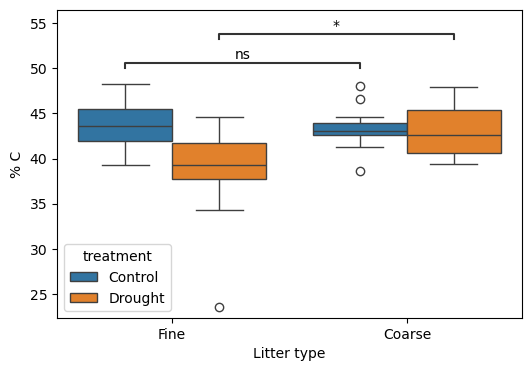

In [46]:
fig,axs=plt.subplots(figsize=[6,4])
treat=['Control','Drought']

pairs = [
    [('Fine', 'Control'), ('Coarse', 'Control')],
    [('Fine', 'Drought'), ('Coarse', 'Drought')]
]

states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=['Fine','Coarse']
hue_plot_params = {
    'data':litter,
    'x': "Litter",
    'y': "concentration",
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs, **hue_plot_params)
annotator = Annotator(axs, pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs.set_ylabel('% C');axs.set_xlabel('Litter type')

## $\delta$13C

###  Roots and litter

Text(0.5, 1.0, 'Course litter, drought plots')

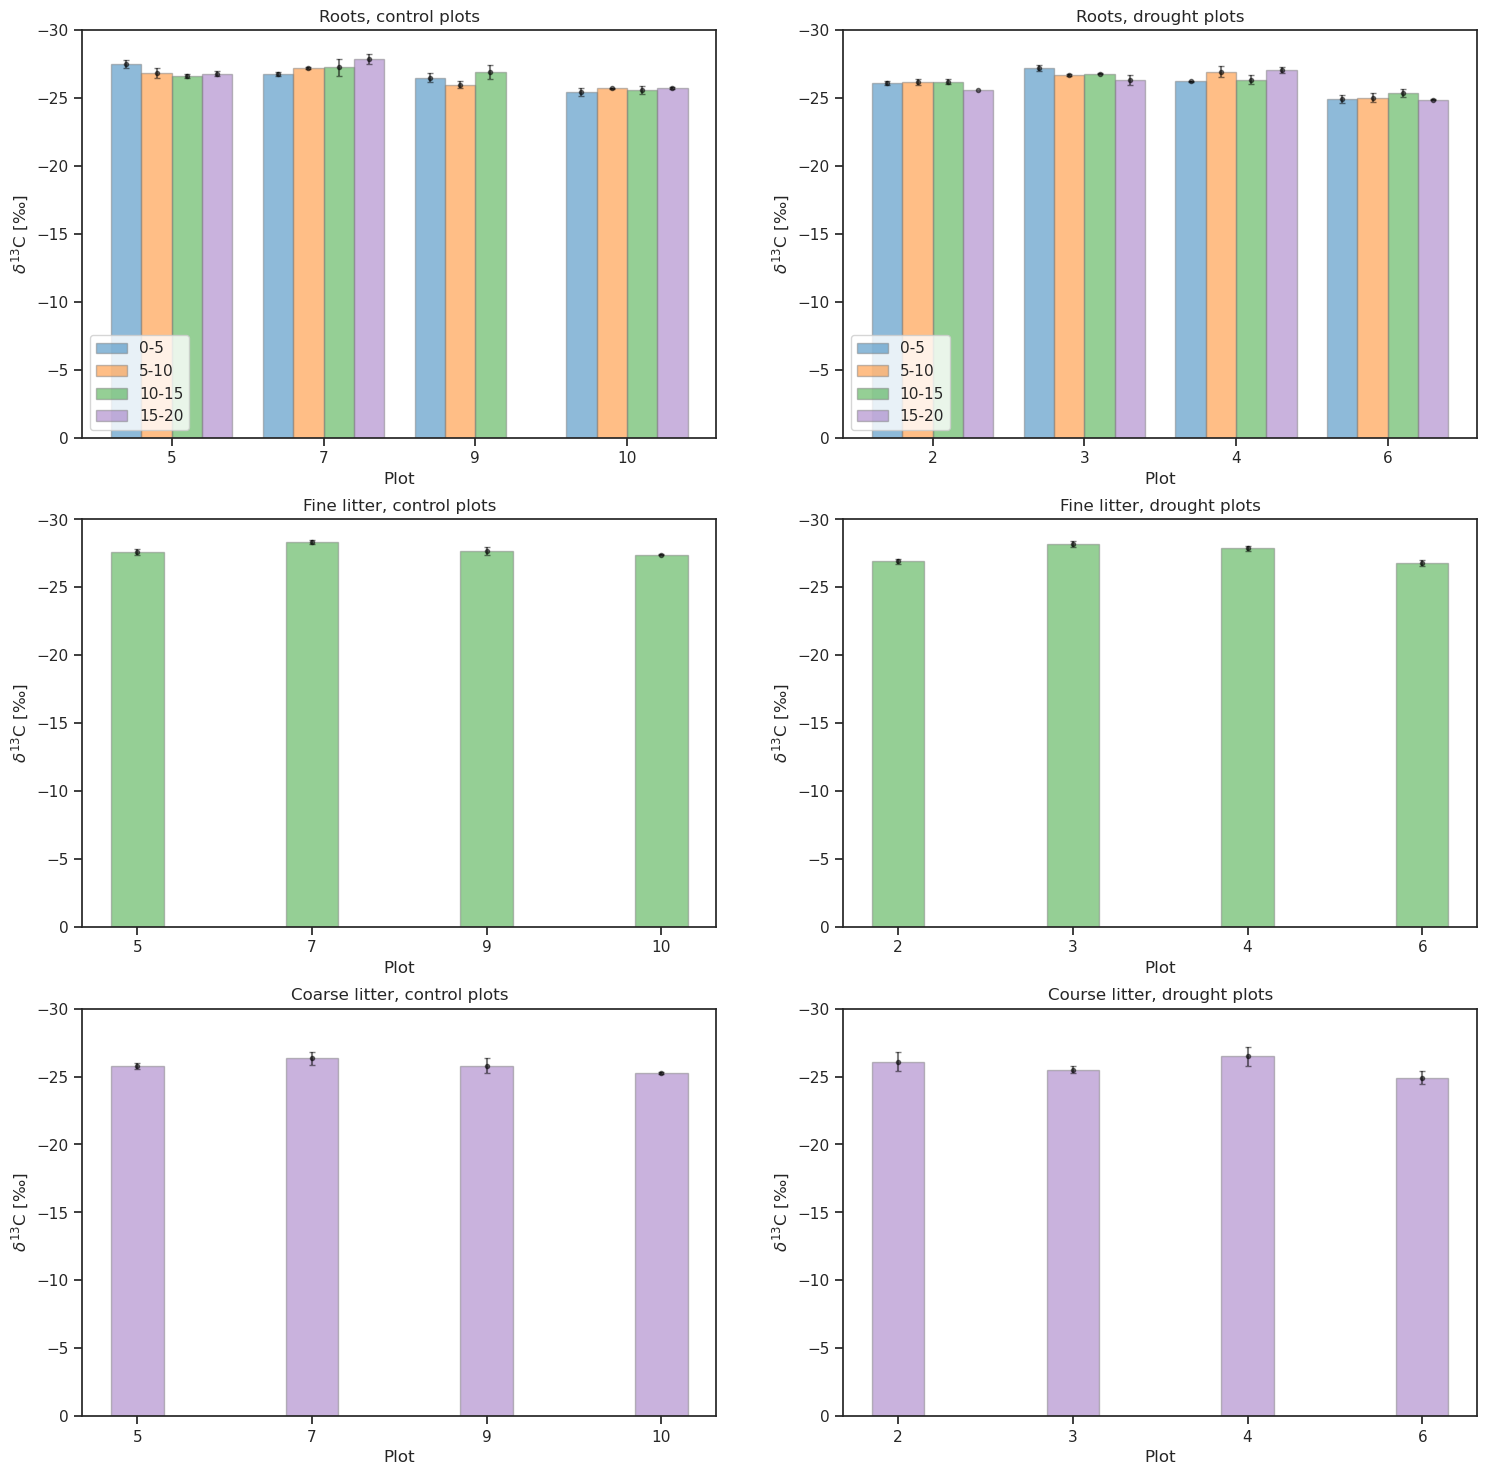

In [48]:
fig,axs=plt.subplots(3,2,figsize=[18,18])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20
vv=roots.columns[18] # d13C.

## Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res1=np.zeros([4,len(depths)])*np.nan; std1=np.zeros([4,len(depths)])*np.nan
res2=np.zeros([4,len(depths)])*np.nan; std2=np.zeros([4,len(depths)])*np.nan
for i in range(4):
    for j in range(len(depths)):
        w=con[(con['plot']==control[i])&(con['depth']==depths[j])]
        res1[i,j]=w[vv].mean();std1[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
        w=dro[(dro['plot']==drought[i])&(dro['depth']==depths[j])]
        res2[i,j]=w[vv].mean();std2[i,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

br1=np.arange(len(depths))
br2=[x+barWidth for x in br1] 
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br=[br1,br2,br3,br4]

for i in range(len(depths)):
    axs[0,0].bar(br[i],res1[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,0].errorbar(br[i],res1[:,i],std1[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[0,1].bar(br[i],res2[:,i],width=barWidth,edgecolor='grey',label=depths[i],color=colors[i],alpha=0.5) 
    axs[0,1].errorbar(br[i],res2[:,i],std2[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0,0].legend();axs[0,1].legend()
axs[0,0].set_xticks([r+barWidth*1.5 for r in range(len(control))],control)
axs[0,1].set_xticks([r+barWidth*1.5 for r in range(len(drought))],drought)
axs[0,0].set_ylabel(u'$\delta^{13}$C [‰]');axs[0,1].set_ylabel(u'$\delta^{13}$C [‰]')
axs[0,0].set_xlabel('Plot'); axs[0,1].set_xlabel('Plot')
axs[0,0].set_title('Roots, control plots'); axs[0,1].set_title('Roots, drought plots')
axs[0,0].set_ylim(0,-30); axs[0,1].set_ylim(0,-30)

# Fine litter
df=litterF
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
#res2=np.zeros(4)*np.nan; std2=np.zeros(4)*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w[vv].mean();std[0,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w[vv].mean();std[1,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
for i in range(2):
    axs[1,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[2],alpha=0.5) 
    axs[1,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[1,i].set_ylabel(u'$\delta^{13}$C [‰]'); axs[1,i].set_xlabel('Plot'); axs[1,i].set_ylim(0,-30)
axs[1,0].set_xticks([r for r in range(len(control))],control)
axs[1,1].set_xticks([r for r in range(len(drought))],drought)
axs[1,0].set_title('Fine litter, control plots'); axs[1,1].set_title('Fine litter, drought plots')

# Course litter
df=litterC
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)] 

res=np.zeros([2,4])*np.nan; std=np.zeros([2,4])*np.nan
for i in range(4):
    w=con[con['plot']==control[i]]
    res[0,i]=w[vv].mean();std[0,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['plot']==drought[i]]
    res[1,i]=w[vv].mean();std[1,i]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
for i in range(2):
    axs[2,i].bar(br[0],res[i,:],width=barWidth+.1,edgecolor='grey',color=colors[3],alpha=0.5) 
    axs[2,i].errorbar(br[0],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[2,i].set_ylabel(u'$\delta^{13}$C [‰]'); axs[2,i].set_xlabel('Plot'); axs[2,i].set_ylim(0,-30)
axs[2,0].set_xticks([r for r in range(len(control))],control)
axs[2,1].set_xticks([r for r in range(len(drought))],drought)
axs[2,0].set_title('Coarse litter, control plots'); axs[2,1].set_title('Course litter, drought plots')

(0.0, -30.0)

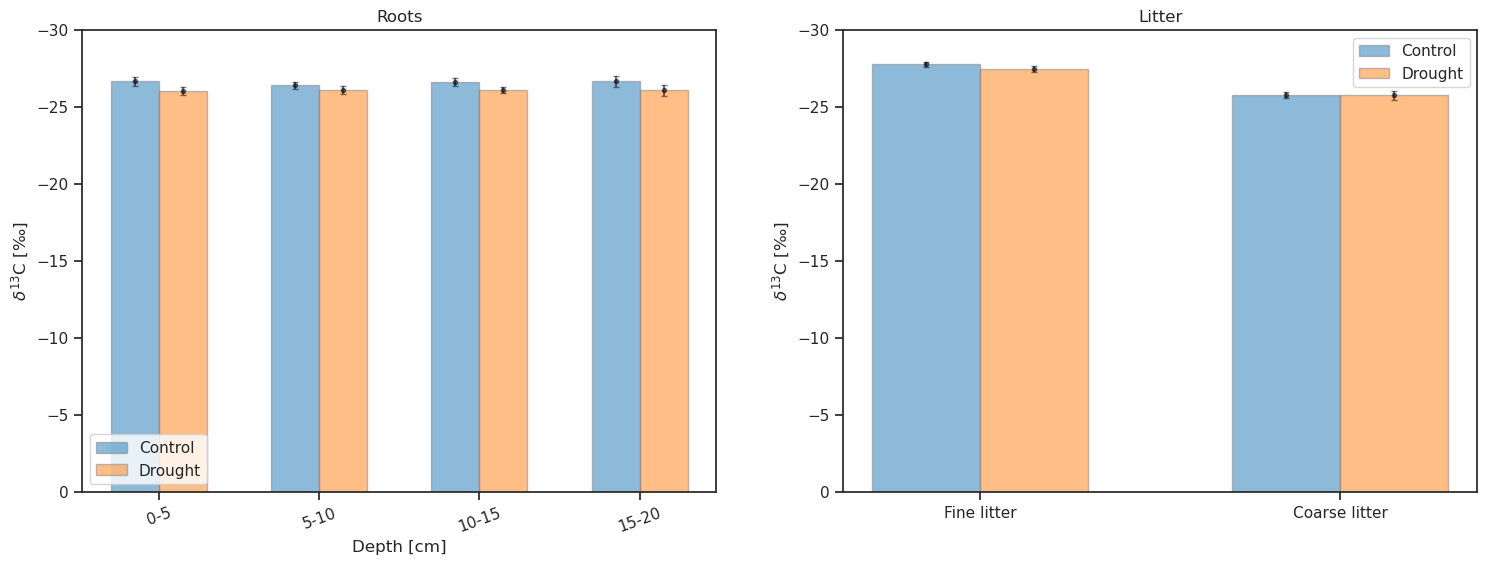

In [49]:
fig,axs=plt.subplots(1,2,figsize=[18,6])
cmap=plt.cm.tab10
colors=cmap(np.linspace(0,1,8))
barWidth=0.20
vv=roots.columns[18] # d13C.

# Roots
depths=roots.depth.unique()
df=roots
con=df[df['plot'].isin(control)] 
dro=df[df['plot'].isin(drought)]

res=np.zeros([2,len(depths)])*np.nan; std=np.zeros([2,len(depths)])*np.nan
for j in range(len(depths)):
    w=con[con['depth']==depths[j]]
    res[0,j]=w[vv].mean();std[0,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))
    w=dro[dro['depth']==depths[j]]
    res[1,j]=w[vv].mean();std[1,j]=w[vv].std()/np.sqrt(len(w[~w[vv].isna()]))

treat=['Control','Drought']
barWidth=0.3
br1=np.arange(4)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[0].bar(br[i],res[i,:],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[0].errorbar(br[i],res[i,:],std[i,:],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[0].legend()
axs[0].set_xticks([r+barWidth/2 for r in range(len(depths))],depths,rotation=20)
axs[0].set_ylabel(u'$\delta^{13}$C [‰]');axs[0].set_xlabel('Depth [cm]')
axs[0].set_title('Roots')
axs[0].set_ylim(0,-30)


## Litter
res=np.zeros([2,2])*np.nan; std=np.zeros([2,4])*np.nan
df=litterF
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[0,0]=con[vv].mean();std[0,0]=con[vv].std()/np.sqrt(len(con[~con[vv].isna()]))
res[0,1]=dro[vv].mean();std[0,1]=dro[vv].std()/np.sqrt(len(dro[~dro[vv].isna()]))
df=litterC
con=df[df['plot'].isin(control)]; dro=df[df['plot'].isin(drought)] 
res[1,0]=con[vv].mean();std[1,0]=con[vv].std()/np.sqrt(len(con[~con[vv].isna()]))
res[1,1]=dro[vv].mean();std[1,1]=dro[vv].std()/np.sqrt(len(dro[~dro[vv].isna()]))

barWidth=0.3
br1=np.arange(2)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

for i in range(2):
    axs[1].bar(br[i],res[:,i],width=barWidth,edgecolor='grey',label=treat[i],color=colors[i],alpha=0.5) 
    axs[1].errorbar(br[i],res[:,i],std[:,i],fmt='.',color='Black',alpha=0.5,capsize=2)
axs[1].legend()
axs[1].set_xticks([r+barWidth/2 for r in range(2)],['Fine litter','Coarse litter'])
axs[1].set_ylabel(u'$\delta^{13}$C [‰]')
axs[1].set_title('Litter')
axs[1].set_ylim(0,-30)

##### Statistical test

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

5-10_Control vs. 5-10_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:7.440e-01 Stat=1.067e-01
0-5_Control vs. 0-5_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.385e-01 Stat=2.195e+00
10-15_Control vs. 10-15_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.270e-01 Stat=1.460e+00
15-20_Control vs. 15-20_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.976e-01 Stat=1.085e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Coarse_Control vs. Coarse_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:6.033e-01 Stat=

/tmp/ipykernel_14949/3396156662.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Litter']=a2; b['Litter']=b2
/tmp/ipykernel_14949/3396156662.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Litter']=a2; b['Litter']=b2


Fine_Control vs. Fine_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:2.253e-01 Stat=1.470e+00


Text(0.5, 1.0, 'Litter')

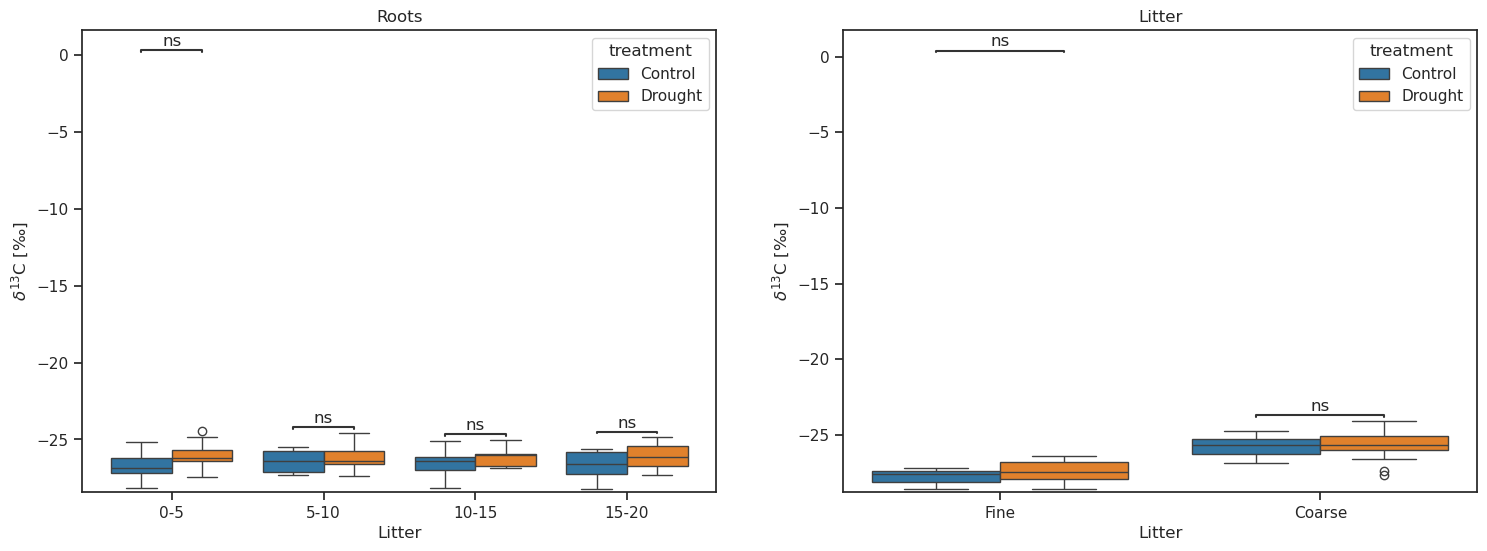

In [50]:
vv=roots.columns[18] # d13C.

fig,axs=plt.subplots(1,2,figsize=[18,6])
treat=['Control','Drought']

## Roots
pairs = [
    [('0-5', 'Control'), ('0-5', 'Drought')],
    [('5-10', 'Control'), ('5-10', 'Drought')],
    [('10-15', 'Control'), ('10-15', 'Drought')],
    [('15-20', 'Control'), ('15-20', 'Drought')],
]

states_palette = sns.color_palette("tab10", n_colors=2)
states_order = treat
subcat_order = depths
hue_plot_params = {
    'data': roots,
    'x': "depth",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs[0], **hue_plot_params)
annotator = Annotator(axs[0], pairs, **hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs[0].set_ylabel(u'$\delta^{13}$C [‰]');axs[0].set_xlabel('Depth [cm]')


## Litter
a=litterF[[vv,'plot','treatment']]; b=litterC[[vv,'plot','treatment']]
a2=['Fine']*len(litterF);b2=['Coarse']*len(litterC)
a['Litter']=a2; b['Litter']=b2
litter13=pd.concat([a,b])

pairs = [
    [('Fine', 'Control'), ('Fine', 'Drought')],
    [('Coarse', 'Control'), ('Coarse', 'Drought')]
]

states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=['Fine','Coarse']
hue_plot_params = {
    'data': litter13,
    'x': "Litter",
    'y': vv,
    "order": subcat_order,
    "hue": "treatment",
    "hue_order": states_order,
    "palette": states_palette
}

sns.boxplot(ax=axs[1],**hue_plot_params)
annotator=Annotator(axs[1],pairs,**hue_plot_params)
annotator.configure(test='Kruskal').apply_and_annotate()
axs[1].set_ylabel(u'$\delta^{13}$C [‰]');axs[0].set_xlabel('Litter')

axs[0].set_title('Roots'); axs[1].set_title('Litter')

### CO$_2$, $\delta$13C , N$_2$O, CH$_4$, and $\delta^{18}$O in ER

In [52]:
fw=pd.read_excel('~/Documents/MSCA/DISEQ/Prades_model/Data/LabResults/Air_ecosystem_d13C.xls')
fw['sampling time']=pd.to_datetime(fw['sampling time'])
# #fw['time']=pd.to_datetime(fw['sampling time'].astype(str) + " " + fw['sampling time'].astype(str))
H=fw['height'].unique()
dtime=np.zeros(len(fw)); day=np.zeros(len(fw))
for i in range(len(fw)):
    dtime[i]=fw['sampling time'][i].hour+fw['sampling time'][i].minute/60
    day[i]=fw['sampling time'][i].day
fw["dtime"]=dtime; fw["day"]=day
fw=fw.rename(columns={'sample description':'Probe'})

#d14C
fw2=pd.read_excel('~/Documents/MSCA/DISEQ/Prades_model/Data/LabResults/Air_ecosystem_d14C.xlsx',header=31)

# Merge
data=pd.merge(fw,fw2,on="Probe")

plot=np.empty(len(data),dtype=int)
for i in range(len(data)):plot[i]=data['Probe'][i].split('_')[3]
data['plot']=plot
heights=data.height.unique()
con=data[data.Experiment=='Control']; dro=data[data.Experiment=='Drought']



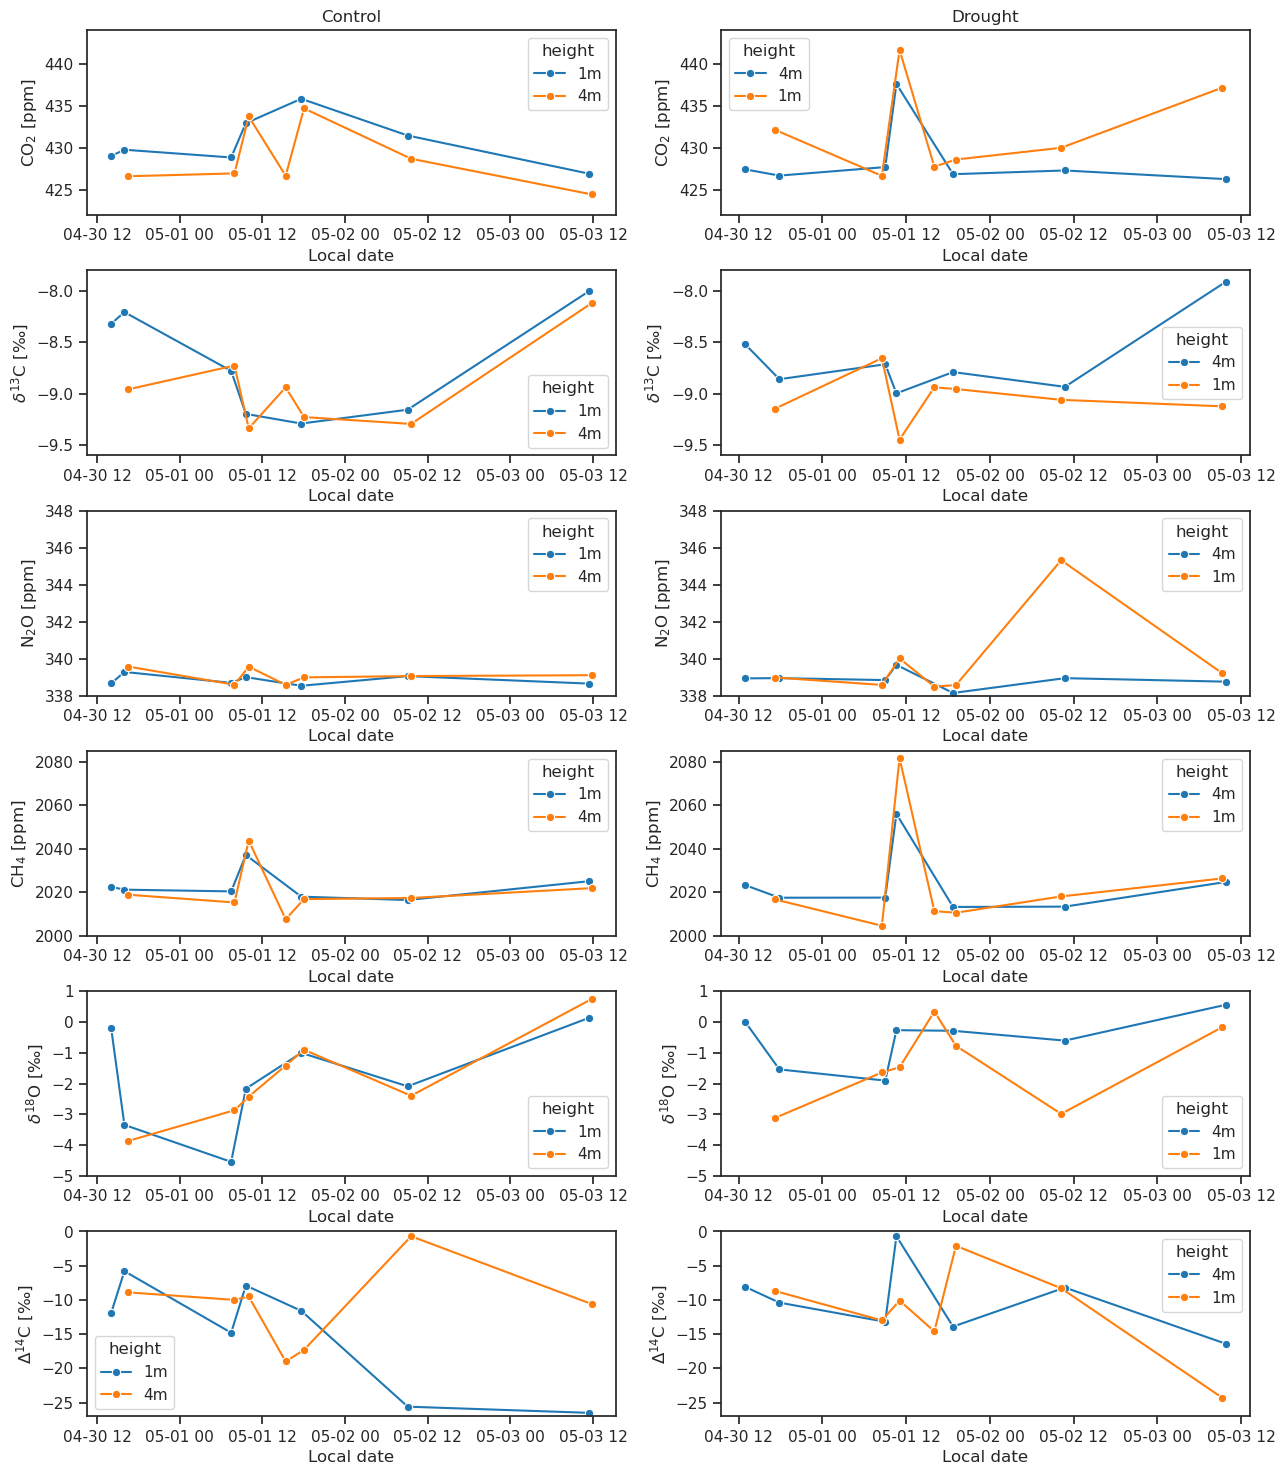

In [53]:
fig,axs=plt.subplots(6,2,figsize=(15,18))
palette=sns.color_palette("tab10",2)

axs[0,0].set_title('Control'); axs[0,1].set_title('Drought')
# CO2
sns.lineplot(data=con,x="sampling time",y="CO2",hue="height",marker="o",palette=palette,ax=axs[0,0])
sns.lineplot(data=dro,x="sampling time",y="CO2",hue="height",marker="o",palette=palette,ax=axs[0,1])
for i in range(2):axs[0,i].set_xlabel('Local date'); axs[0,i].set_ylabel(r'CO$_{2}$ [ppm]');axs[0,i].set_ylim(422,444)

# d13C
sns.lineplot(data=con,x="sampling time",y="d13C",hue="height",marker="o",palette=palette,ax=axs[1,0])
sns.lineplot(data=dro,x="sampling time",y="d13C",hue="height",marker="o",palette=palette,ax=axs[1,1])
for i in range(2):axs[1,i].set_xlabel('Local date'); axs[1,i].set_ylabel(r'$\delta^{13}$C [‰]'),axs[1,i].set_ylim(-9.6,-7.8)
    
# N2O
sns.lineplot(data=con,x="sampling time",y="N2O",hue="height",marker="o",palette=palette,ax=axs[2,0])
sns.lineplot(data=dro,x="sampling time",y="N2O",hue="height",marker="o",palette=palette,ax=axs[2,1])
for i in range(2):axs[2,i].set_xlabel('Local date'); axs[2,i].set_ylabel(r'N$_2$O [ppm]');axs[2,i].set_ylim(338,348)

# CH4
sns.lineplot(data=con,x="sampling time",y="CH4",hue="height",marker="o",palette=palette,ax=axs[3,0])
sns.lineplot(data=dro,x="sampling time",y="CH4",hue="height",marker="o",palette=palette,ax=axs[3,1])
for i in range(2):axs[3,i].set_xlabel('Local date'); axs[3,i].set_ylabel(r'CH$_4$ [ppm]');axs[3,i].set_ylim(2000,2085)

# d18O
sns.lineplot(data=con,x="sampling time",y="d18O",hue="height",marker="o",palette=palette,ax=axs[4,0])
sns.lineplot(data=dro,x="sampling time",y="d18O",hue="height",marker="o",palette=palette,ax=axs[4,1])
for i in range(2):axs[4,i].set_xlabel('Local date'); axs[4,i].set_ylabel(r'$\delta^{18}$O [‰]');axs[4,i].set_ylim(-5,1)
    
# F14C
sns.lineplot(data=con,x="sampling time",y='∆14C  (‰)',hue="height",marker="o",palette=palette,ax=axs[5,0])
sns.lineplot(data=dro,x="sampling time",y='∆14C  (‰)',hue="height",marker="o",palette=palette,ax=axs[5,1])
for i in range(2):axs[5,i].set_xlabel('Local date'); axs[5,i].set_ylabel(r'$\Delta^{14}$C [‰]');axs[5,i].set_ylim(-27,0)
    
plt.subplots_adjust(hspace=0.3)
fig.savefig('Figures/Data_field/Air_measured_variables_Prades.pdf')
   

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

4m_Control vs. 4m_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:8.480e-01 Stat=3.673e-02
1m_Control vs. 1m_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:9.491e-01 Stat=4.082e-03
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

4m_Control vs. 4m_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:1.102e-01 Stat=2.551e+00
1m_Control vs. 1m_Drought: Kruskal-Wallis independent samples (pairwise between groups), P_val:4.822e-01 Stat=4.939e-01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
    

(-27.0, 5.0)

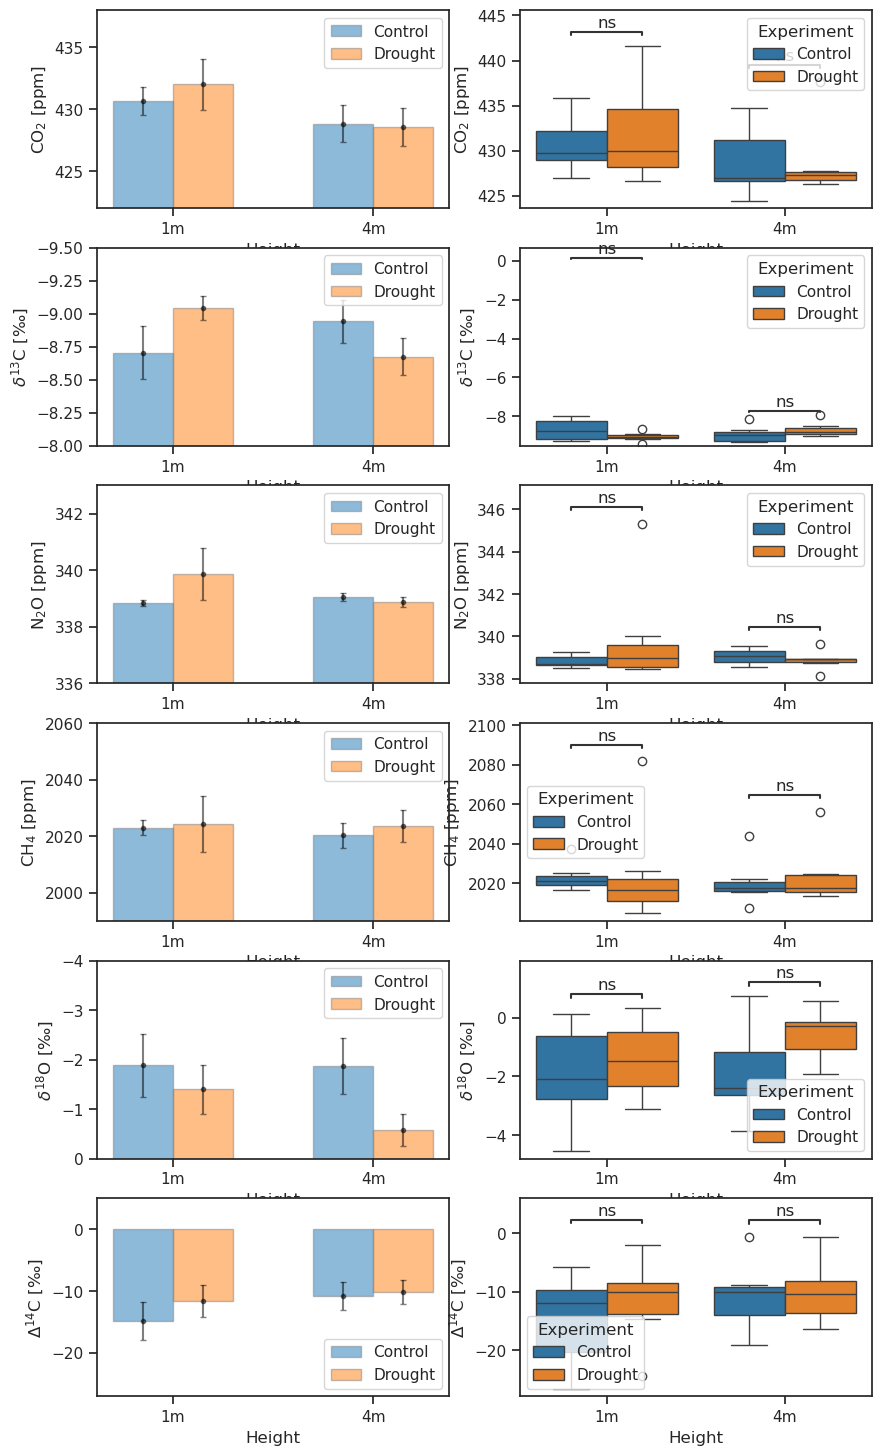

In [55]:
fig,axs=plt.subplots(6,2,figsize=(10,18))
heights=['1m','4m']; treat=['Control','Drought']
barWidth=0.3
br1=np.arange(2)
br2=[x+barWidth for x in br1] 
br=[br1,br2]

pairs = [
    [('1m', 'Control'), ('1m', 'Drought')],
    [('4m', 'Control'), ('4m', 'Drought')]
    ]

states_palette=sns.color_palette("tab10", n_colors=2)
states_order=treat
subcat_order=heights

vv=['CO2','d13C','N2O','CH4','d18O','∆14C  (‰)']
tit=[r'CO$_{2}$ [ppm]',r'$\delta^{13}$C [‰]',r'N$_2$O [ppm]',r'CH$_4$ [ppm]',r'$\delta^{18}$O [‰]',r'$\Delta^{14}$C [‰]']
for i in range(6): # variables
    res=np.empty(2);std=np.empty(2)
    for j in range(2): # treatment
        for k in range(2): #heights
            res[k]=data[(data.height==heights[k])& (data.Experiment==treat[j])][vv[i]].mean()
            a=data[(data.height==heights[k])& (data.Experiment==treat[j])][vv[i]]
            std[k]=a.std()/np.sqrt(len(a[~a.isna()]))
        axs[i,0].bar(br[j],res,width=barWidth,edgecolor='grey',label=treat[j],color=colors[j],alpha=0.5) 
        axs[i,0].errorbar(br[j],res,std,fmt='.',color='Black',alpha=0.5,capsize=2)
    axs[i,0].legend()
    axs[i,0].set_ylabel(tit[i]); axs[i,0].set_xlabel('Height')
    axs[i,0].set_xticks([r+barWidth/2 for r in range(2)],heights)

    hue_plot_params = {
        'data': data,
        'x': "height",
        'y': vv[i],
        "order": subcat_order,
        "hue": "Experiment",
        "hue_order": states_order,
        "palette": states_palette
    }

    sns.boxplot(ax=axs[i,1],**hue_plot_params)
    annotator=Annotator(axs[i,1],pairs,**hue_plot_params)
    annotator.configure(test='Kruskal').apply_and_annotate()
    axs[i,1].set_ylabel(tit[i]);axs[i,1].set_xlabel('Height')
    
axs[0,0].set_ylim(422,438)
axs[1,0].set_ylim(-8,-9.5)
axs[2,0].set_ylim(336,343)
axs[3,0].set_ylim(1990,2060)
axs[4,0].set_ylim(0,-4)
axs[5,0].set_ylim(-27,5)
# axs[0].set_title('Roots'); axs[1].set_title('Litter')

### Resume carbon percentage 

In [56]:
test[12:16]

array([0.02092134, 0.04330814, 0.11028675, 0.6639079 ])

In [57]:
# Merge soil and roots dataframes to facilitate plotting.
dataCr=dataC[['SN2','treatment','Result','plot','Sample name','Rep']]
rootsr=roots[['depth','treatment','concentration','plot','Identifier 1','Rep']]
dataCr=dataCr.rename(columns={"SN2": "depth", "Result": "Ctotal"})
rootsr=rootsr.rename(columns={"concentration": "Ctotal"})
dataCr=dataCr.assign(pool='Soil'); rootsr=rootsr.assign(pool='Roots')
c_depth=pd.concat([dataCr,rootsr], ignore_index=True, sort=False)

/tmp/ipykernel_14949/3052745300.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(litter[litter['treatment']==treat[i]], x="concentration", y="Litter",
/tmp/ipykernel_14949/3052745300.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(litter[litter['treatment']==treat[i]], x="concentration", y="Litter",
/tmp/ipykernel_14949/3052745300.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels(["Fine\nlitter","Coarse\nlitter",'0-5 cm','5-10 cm','10-15 cm','15-20 cm'])


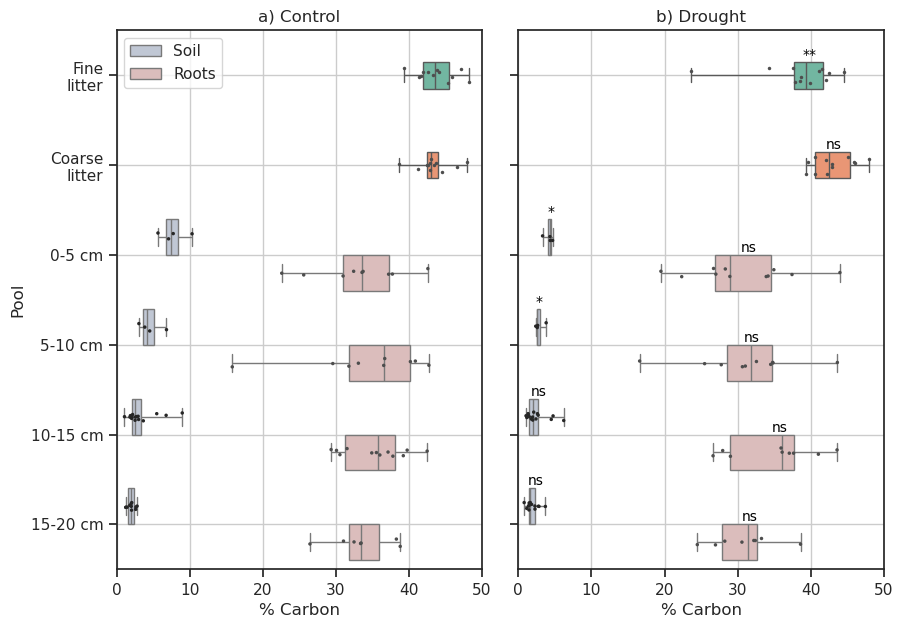

In [61]:
treat=['Control','Drought']
pp=['a)','b)']
sns.set_theme(style="ticks")
fig,ax=plt.subplots(1,2,figsize=(7*np.sqrt(2),7))
for i in range(2):
# Litter    
    #, width=.3
    sns.boxplot(litter[litter['treatment']==treat[i]], x="concentration", y="Litter",
                whis=[0,100], width=.3,palette="Set2",ax=ax[i])
    sns.stripplot(litter[litter['treatment']==treat[i]], x="concentration", y="Litter",
                  size=2.5,color=".3",ax=ax[i])
    # add p value.
    if i==1:
        medians=litter[litter['treatment']==treat[i]].groupby(['Litter'],sort=False)['concentration'].median()
        w=test[6:8]
        p=['']*(len(w))
        for k in range(len(w)):
            if w[k]>5e-2:p[k]='ns'
            elif w[k]>1e-2:p[k]='*'
            elif w[k]>1e-3:p[k]='**'
            elif w[k]>1e-4:p[k]='***'
            else: p[k]='****'
        pos=range(len(medians))
        for tick,label in zip(pos,ax[i].get_yticklabels()):
            ax[i].text(medians[tick]-0.5,tick-0.15,p[tick],color='black',verticalalignment="bottom",size=10)
        
# Soil and roots.
    sns.boxplot(c_depth[c_depth['treatment']==treat[i]], x="Ctotal", y="depth",hue='pool',
        whis=[0, 100],palette='vlag',ax=ax[i])
    sns.stripplot(c_depth[c_depth['treatment']==treat[i]], x="Ctotal", y="depth",hue='pool',
                  size=2.5,palette='dark:.3',ax=ax[i],dodge=True)          
    # add p value              
    if i==1:
        # Soil
        medians=c_depth[(c_depth['treatment']==treat[i])& (c_depth['pool']=='Soil')].groupby(['depth'],sort=False)['Ctotal'].median()
        w=test[12:16]
        p=['']*(len(w))
        for k in range(len(w)):
            if w[k]>5e-2:p[k]='ns'
            elif w[k]>1e-2:p[k]='*'
            elif w[k]>1e-3:p[k]='**'
            elif w[k]>1e-4:p[k]='***'
            else: p[k]='****'
        pos=range(len(medians))
        for tick,label in zip(pos,ax[i].get_yticklabels()):
            ax[i].text(medians[tick]-0.3,tick+2-0.4,p[tick],color='black',verticalalignment="bottom",size=10)
            
        # Roots
        medians=c_depth[(c_depth['treatment']==treat[i])& (c_depth['pool']=='Roots')].groupby(['depth'],sort=False)['Ctotal'].mean()
        w=test[8:12]
        p=['']*(len(w))
        for k in range(len(w)):
            if w[k]>5e-2:p[k]='ns'
            elif w[k]>1e-2:p[k]='*'
            elif w[k]>1e-3:p[k]='**'
            elif w[k]>1e-4:p[k]='***'
            else: p[k]='****'
        pos=range(len(medians))
        for tick,label in zip(pos,ax[i].get_yticklabels()):
            ax[i].text(medians[tick]-0.3,tick+2,p[tick],color='black',verticalalignment="bottom",size=10)

    ax[i].set_xlabel("% Carbon")
    ax[i].set_xlim(0,50)
    ax[i].set_title(pp[i]+' '+treat[i])
    ax[i].yaxis.grid(True); ax[i].xaxis.grid(True)
    handles,labels = ax[i].get_legend_handles_labels()
    ax[i].legend(handles[:2], labels[:2], loc='upper left')

#ax[1].set_ylabel('')
ax[1].get_legend().set_visible(False)
ax[0].set_ylabel('Pool')
plt.setp(ax[1].get_yticklabels(), visible=False)
ax[0].set_yticklabels(["Fine\nlitter","Coarse\nlitter",'0-5 cm','5-10 cm','10-15 cm','15-20 cm'])
#ax[0].spines[['right']].set_visible(False)
#ax[1].spines[['left']].set_visible(False)
ax[1].set(ylabel=None)

plt.subplots_adjust(wspace=0.1)
fig.savefig('Figures/Data_field/Carbon_perc_Prades.pdf')

In [34]:
test[12:16]

array([nan, nan, nan, nan])